<a href="https://colab.research.google.com/github/udsingh69/MachineLearningUsingPython/blob/main/TelecomChurn/telecom_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TELECOM CHURN PREDICTION**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)
  - **4.3** [**Pre Profiling Report**](#Section44)

**5.** [**Data Pre-processing**](#Section5)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Post Data Processing**](#Section7)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>

**9.** [**Conclusion**](#Section9)<br>

<a id = Section1></a>

---
# **1. About the Dataset**

---
The Telecom Churn Prediction dataset contains information about customers of a telecom company, including demographics, services used, and account information. The goal of analyzing this dataset is to understand the factors that contribute to customer churn and to develop strategies for customer retention

<a id = Section2></a>

---
# **2. Problem Statement**
---

- The classification goal is to predict wheather a customer will churn or not.
- The given dataset is having 21 feature along with target variable curn.

<a id = Section3></a>

---
# **3. Installing and importing libraries**
---

<a id = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q ydata-profiling

<a id = Section32></a>
### **3.2 Upgrading Libraries**

In [ ]:
!pip install -q --upgrade ydata-profiling

<a id = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from ydata_profiling import ProfileReport                           # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', 50)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.metrics import classification_report
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn.preprocessing import LabelEncoder
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

<a id = Section4></a>

---
# **4. Data Acquisition and Description**
---

- This data is based on the various features that are present in the **customer churn data** and the **classification** of them based on it.
- The Dataset contains the following columns:

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 5634 | 21 | 924.5 KB |




| Id | Features | Description |
| :-- | :--| :--|
|01| **CustomerID** | Passenger Identity |
|02| **Gender** | Whether the customer is a male or a female
|03| **SeniorCitizen** | Contains the month of the year in which the data was Recorded|
|04| **Partner** | Whether the customer has a partner or not (Yes, No)|
|05| **Dependents** | Whether the customer has dependents or not (Yes, No) |
|06| **Tenure** | Number of months the customer has stayed with the company |
|07| **PhoneService** | Whether the customer has a phone service or not (Yes, No)
|08| **MultipleLines** | Whether the customer has multiple lines or not (Yes, No, No phone service) |
|09| **InternetService** | Customer’s internet service provider (DSL, Fiber optic, No) |
|10| **OnlineSecurity** | Whether the customer has online security or not (Yes, No, No internet service)
|11| **OnlineBackup** | Whether the customer has online backup or not (Yes, No, No internet service) |
|12| **DeviceProtection** | Whether the customer has device protection or not (Yes, No, No internet service) |
|13| **TechSupport** | Whether the customer has tech support or not (Yes, No, No internet service)|
|14| **StreamingTV** | Whether the customer has streaming TV or not (Yes, No, No internet service)|
|15| **StreamingMovies** | Whether the customer has streaming movies or not (Yes, No, No internet service)|
|16| **Contract** | The contract term of the customer (Month-to-month, One year, Two year) |
|17| **PaperlessBilling** | Whether the customer has paperless billing or not (Yes, No) |
|18| **PaymentMethod** | he customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
|19| **MonthlyCharges** | The amount charged to the customer monthly |
|20| **TotalCharges** | The total amount charged to the customer |
|21| **Churn** | Whether the customer churned or not (Yes or No) |

In [ ]:
check_data = pd.read_csv('/content/sample_data/Churn_test.csv')
output_data = pd.DataFrame()
output_data['customerID'] = check_data['customerID']
input_data = pd.read_csv('/content/sample_data/Churn_train.csv')

In [ ]:
input_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70000,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90000,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15000,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45000,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40000,2044.75,No


In [ ]:
input_data.shape

(5634, 21)

<a id = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
input_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.00000,5634.00000,5634.00000
mean,0.16187,32.27796,64.77913
std,0.36837,24.55521,30.10499
min,0.00000,0.00000,18.25000
25%,0.00000,9.00000,35.40000
50%,0.00000,29.00000,70.37500
75%,0.00000,55.00000,89.85000
max,1.00000,72.00000,118.65000


<a id = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


**Observations:**
- There are **21 features**, total charges should be float
- No missing values

<a id = Section5></a>
# **5. Data Pre-Processing**

In [ ]:
input_data['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,1893
Mailed check,1305
Bank transfer (automatic),1219
Credit card (automatic),1217


In [ ]:
input_data['Contract'].value_counts()

,count
Contract,
Month-to-month,3104
Two year,1344
One year,1186


In [ ]:
check_data['Contract'].value_counts()

,count
Contract,
Month-to-month,771
Two year,351
One year,287


In [ ]:
input_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70000,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90000,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15000,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45000,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40000,2044.75,No


In [ ]:
input_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.00000,5634.00000,5634.00000
mean,0.16187,32.27796,64.77913
std,0.36837,24.55521,30.10499
min,0.00000,0.00000,18.25000
25%,0.00000,9.00000,35.40000
50%,0.00000,29.00000,70.37500
75%,0.00000,55.00000,89.85000
max,1.00000,72.00000,118.65000


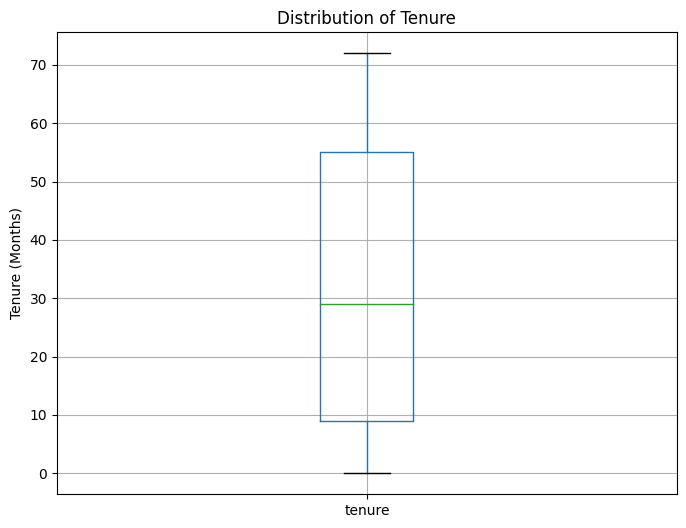

In [ ]:
plt.figure(figsize=(8, 6))
input_data.boxplot(column='tenure')
plt.ylabel('Tenure (Months)')
plt.title('Distribution of Tenure')
plt.show()

In [ ]:
input_data['StreamingTV'].value_counts()

,count
StreamingTV,
No,2246
Yes,2167
No internet service,1221


In [ ]:
check_data['TotalCharges'] = pd.to_numeric(check_data['TotalCharges'], errors='coerce')

input_data['TotalCharges'] = pd.to_numeric(input_data['TotalCharges'], errors='coerce')

In [ ]:
input_data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
check_data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
input_data['TotalCharges'] = input_data['TotalCharges'].fillna(input_data['TotalCharges'].mean())

check_data['TotalCharges'] = check_data['TotalCharges'].fillna(check_data['TotalCharges'].mean())

<a id = Section55></a>
### **5.1 Post Profiling Report**

- In post profiling, we identify the changes over cleansed data.

In [ ]:
profile = ProfileReport(input_data)
profile.to_file(output_file="Post Profiling Report.html")
print('Post-Profiling Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Post-Profiling Accomplished!


<a id = Section6></a>
# **6. Exploratory Data Analysis**

---
**<h4>Question 1:** Create a function to get the frequency distribution of the target variable in the dataset? </h4>

In [ ]:
input_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70000,258.35000,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90000,3160.55000,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15000,4681.75000,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45000,6300.85000,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40000,2044.75000,No


In [ ]:
def countplot(df):
  plt.figure(figsize = (22,5))
  sns.countplot(x='Churn',data=df)
  plt.xlabel('Churn')
  plt.ylabel('Count')
  plt.title('Distribution of Churn')
  plt.show()

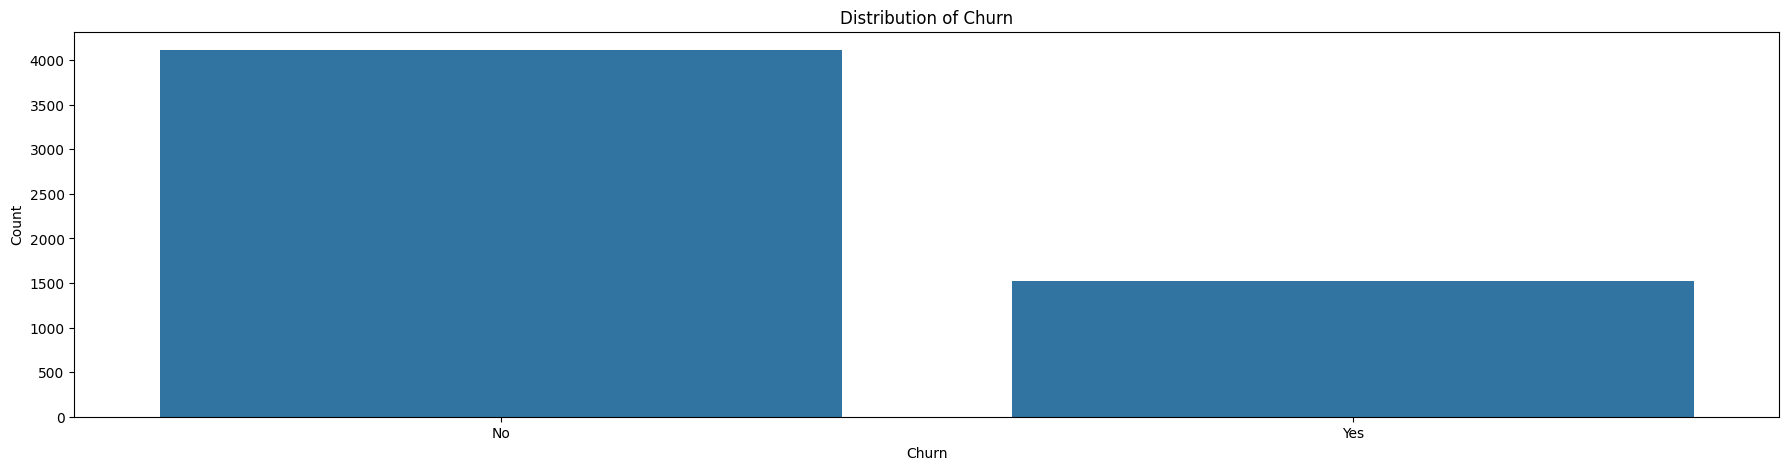

In [ ]:
countplot(input_data)

**<h4>Question 2:** Relationship between churn and gender </h4>

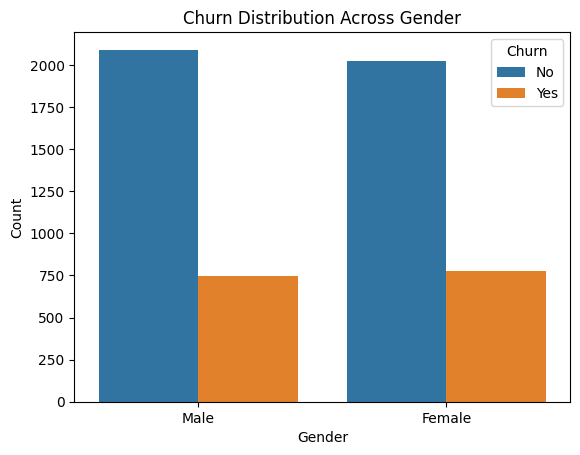

In [ ]:
sns.countplot(x='gender', hue='Churn', data=input_data)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Distribution Across Gender')

plt.show()

**<h4>Question 3:** Relationship between churn and age </h4>

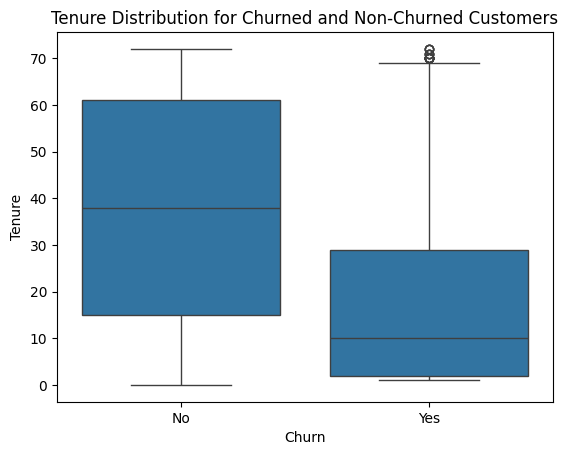

In [ ]:
sns.boxplot(x='Churn', y='tenure', data=input_data)
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Tenure Distribution for Churned and Non-Churned Customers')

plt.show()

**<h4>Question 4:** Relationship between churn and monthly charge </h4>

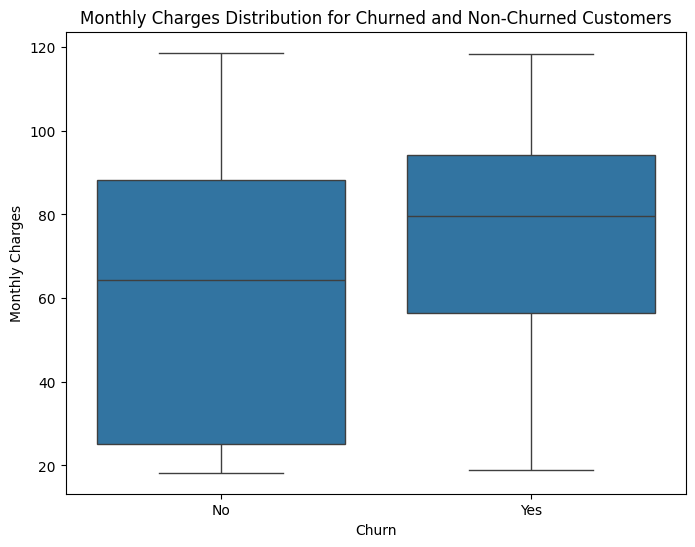

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=input_data)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges Distribution for Churned and Non-Churned Customers')

plt.show()

**<h4>Question 5:** How does Payment Method affect churn </h4>

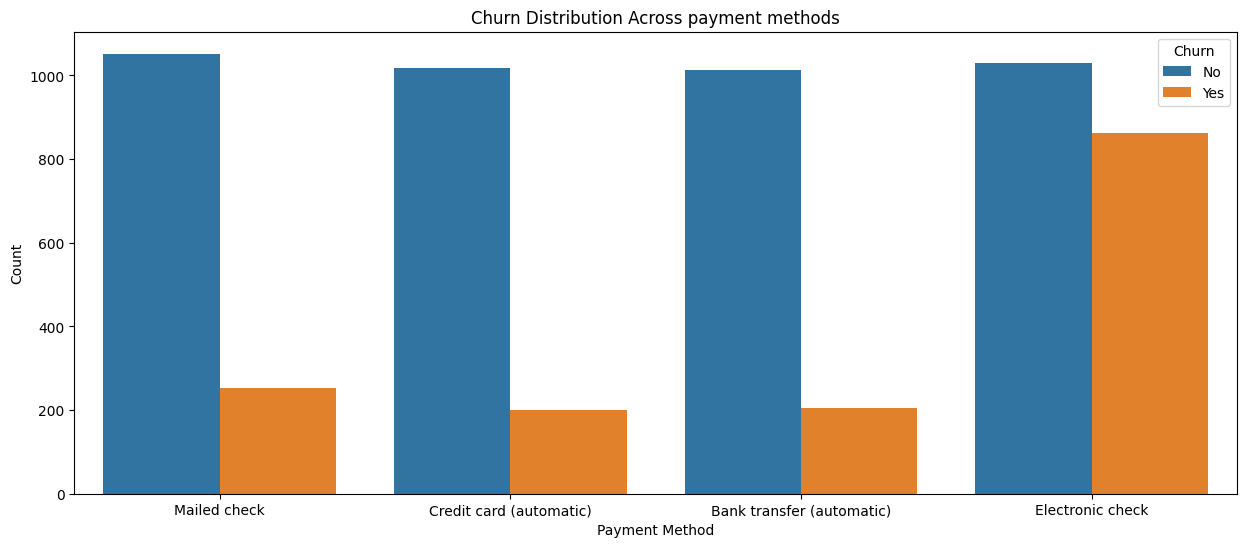

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=input_data)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Churn Distribution Across payment methods')

plt.show()

**<h4>Question 6:** How does Contract Type affect churn </h4>

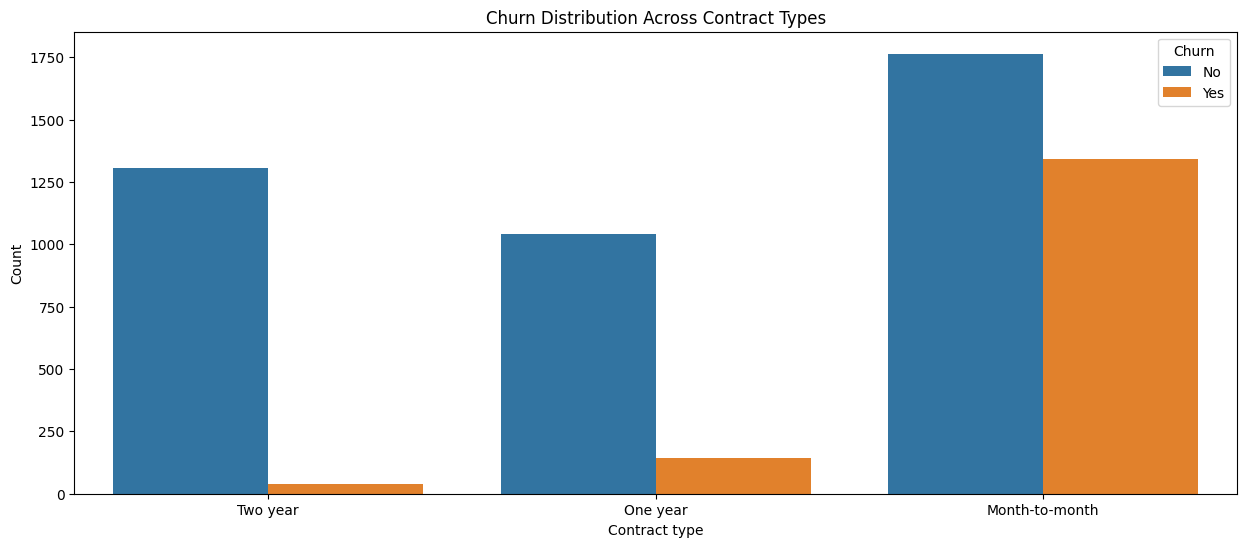

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Contract', hue='Churn', data=input_data)
plt.xlabel('Contract type')
plt.ylabel('Count')
plt.title('Churn Distribution Across Contract Types')

plt.show()

**<h4>Question 7:** How does Tech Support affect churn </h4>

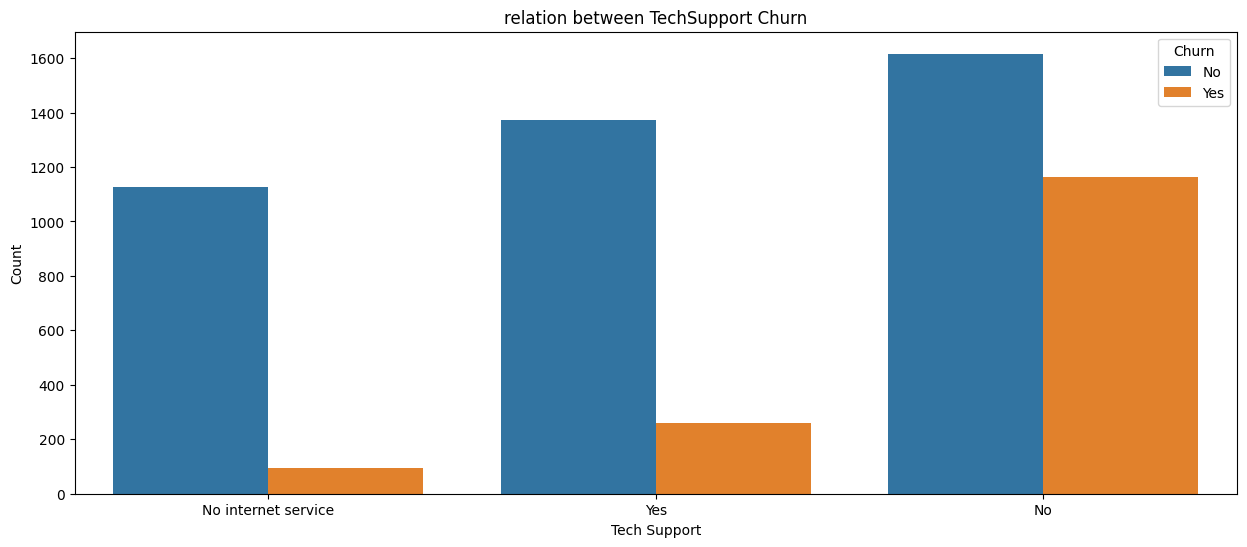

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='TechSupport', hue='Churn', data=input_data)
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.title('relation between TechSupport Churn')
plt.show()

**<h4>Question 8:** Churn Distribution for Paperless vs. Paper Billing </h4>

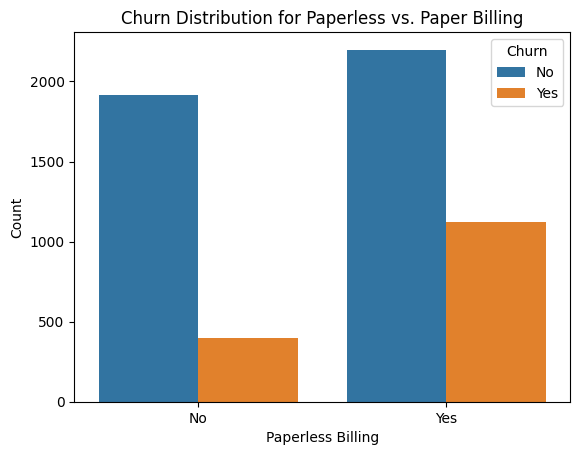

In [ ]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=input_data)
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.title('Churn Distribution for Paperless vs. Paper Billing')
plt.show()

**<h4>Question 9:** Relations between Churn and Total Charges </h4>

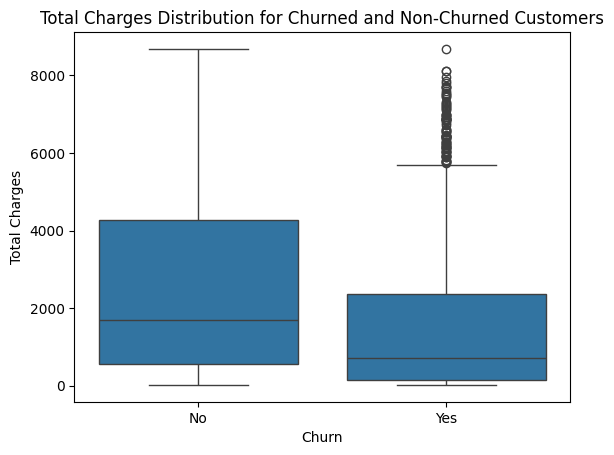

In [ ]:
sns.boxplot(x='Churn', y='TotalCharges', data=input_data)
plt.xlabel('Churn')
plt.ylabel('Total Charges')

plt.title('Total Charges Distribution for Churned and Non-Churned Customers')
plt.show()

In [ ]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


<a id = Section7></a>

---
# **7. Post Data Processing**
---

- We will do **label encoding** and **split** our **data** for the **model development**.

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
def correct_dat(data):
  oneCode_cols =[]
  labelCode_cols =[]
  for col in data.columns:
    if data[col].nunique() == 2:
      oneCode_cols.append(col)
    if data[col].nunique() == 3:
      labelCode_cols.append(col)
  print(oneCode_cols)
  labelCode_cols.append('PaymentMethod')
  print(labelCode_cols)
  data = pd.get_dummies(data, columns=oneCode_cols, drop_first=True)
  for col in labelCode_cols:
    data[col] = label_encoder.fit_transform(data[col])
  return data

In [ ]:
input_data =correct_dat(input_data)
input_data.drop('customerID', axis=1, inplace=True)
input_data.head()

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes
0,12,0,2,1,1,1,1,1,1,2,3,19.70000,258.35000,True,False,True,True,True,False,False
1,42,0,0,2,2,2,2,0,2,1,1,73.90000,3160.55000,False,False,False,False,True,False,True
2,71,2,0,2,2,0,2,0,0,2,0,65.15000,4681.75000,True,False,True,False,True,False,False
3,71,2,0,2,0,2,2,2,2,1,2,85.45000,6300.85000,True,False,True,True,True,False,False
4,30,0,0,2,2,0,2,2,0,1,2,70.40000,2044.75000,True,False,False,False,True,False,False


In [ ]:
check_data =correct_dat(check_data)
check_data.drop('customerID', axis=1, inplace=True)
check_data.head()
check_data.shape

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


(1409, 19)

In [ ]:
X = input_data.drop('Churn_Yes',axis = 1)
y = input_data['Churn_Yes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1234)

In [ ]:
y_train.shape

(4507,)

<a id = Section8></a>

---
# **8. Model Development & Evaluation**
---

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# predicting on train data
y_pred_train = logreg.predict(X_train)

# predicting on test data
y_pred_test = logreg.predict(X_test)

In [ ]:
y_pred_test

array([False, False,  True, ..., False,  True, False])

In [ ]:
y_test.values

array([ True,  True,  True, ..., False,  True, False])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
test_report = classification_report(y_pred=y_pred_test, y_true=y_test)

In [ ]:
print(test_report)

              precision    recall  f1-score   support

       False       0.82      0.88      0.85       800
        True       0.63      0.52      0.57       327

    accuracy                           0.77      1127
   macro avg       0.72      0.70      0.71      1127
weighted avg       0.76      0.77      0.77      1127



In [ ]:
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.7728482697426797


In [ ]:
output_data.shape

(1409, 1)

In [ ]:
output_pridct =logreg.predict(check_data)

In [ ]:
output_pridct.shape

(1409,)

In [ ]:
output_data['result']= output_pridct

In [ ]:
output_data.head()

,customerID,result
0,8879-ZKJOF,False
1,0201-MIBOL,False
2,1600-DILPE,False
3,8601-QACRS,True
4,7919-ZODZZ,False


In [ ]:
output_data['result'] = output_data['result'].map({True: 'Yes', False: 'No'})

In [ ]:
output_data.head()

,customerID,result
0,8879-ZKJOF,No
1,0201-MIBOL,No
2,1600-DILPE,No
3,8601-QACRS,Yes
4,7919-ZODZZ,No


In [ ]:
output_data.shape

(1409, 2)

In [ ]:
output_data.to_csv('submission.csv', index=False, header=False)

---
<a id = Section9></a>

# **9. Conclusion**
---

**Observations:**

- We **studied in depth about the data**, its **characteristics** and its **distribution**.

- We **discussed relationship b/w churn and idfferent features** .

- We **performed model development**

- We **evaluated our model** calculate the **accuracy_score** and **classification report** and were able to obtain 77.28% accuracy